In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#========================== IMPORT PACKAGES ============================

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/1. Project /stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#========================== PRE PROCESSING ================================

#====== checking missing values ========

print()
print("----------------------------------------------------")
print("Before Handling Missing values             ")
print("----------------------------------------------------")
print()
print(df.isnull().sum())

print()
print("----------------------------------------------------")
print(" After Handling Missing Values             ")
print("----------------------------------------------------")
print()
dataframe=df.fillna(0)
print(df.isnull().sum())


----------------------------------------------------
Before Handling Missing values             
----------------------------------------------------

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

----------------------------------------------------
 After Handling Missing Values             
----------------------------------------------------

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
#========= label encoding ===========

label_encoder = preprocessing.LabelEncoder()

print()
print("----------------------------------------------------")
print("Before Label Encoding                 ")
print("----------------------------------------------------")
print()
print(dataframe['gender'].head(10))

print()
print("----------------------------------------------------")
print("After Label Encoding                  ")
print("----------------------------------------------------")
print()

dataframe['gender']= label_encoder.fit_transform(dataframe['gender'])

print(dataframe['gender'].head(10))

Label=['ever_married','work_type','Residence_type','smoking_status']

dataframe[Label] = dataframe[Label].apply(label_encoder.fit_transform)


----------------------------------------------------
Before Label Encoding                 
----------------------------------------------------

0      Male
1    Female
2      Male
3    Female
4    Female
5      Male
6      Male
7    Female
8    Female
9    Female
Name: gender, dtype: object

----------------------------------------------------
After Label Encoding                  
----------------------------------------------------

0    1
1    0
2    1
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: gender, dtype: int64


In [ ]:
#========================== FEATURE SLECTION ===========================

# === CHI SQUARE ===

X=dataframe.drop(['stroke'],axis=1)
y=dataframe['stroke']

chi_squ = SelectKBest(chi2,k=10)

best_fea= chi_squ.fit_transform(X, y)

print()
print("----------------------------------------------------")
print("Feature Selection ---> Chi square                 ")
print("----------------------------------------------------")
print()
print("Total no of original Features :",X.shape[1])
print()
print("Total no of reduced Features  :",best_fea.shape[1])
print()


----------------------------------------------------
Feature Selection ---> Chi square                 
----------------------------------------------------

Total no of original Features : 11

Total no of reduced Features  : 10



In [ ]:
#========================== DATA SPLITTING ===========================


X_train, X_test, y_train, y_test = train_test_split(best_fea, y, test_size=0.2, random_state=0)

print()
print("----------------------------------------------------")
print("Data Splitting                    ")
print("----------------------------------------------------")
print()

print("Total no of data        :",dataframe.shape[0])
print("Total no of test data   :",X_test.shape[0])
print("Total no of train data  :",X_train.shape[0])


----------------------------------------------------
Data Splitting                    
----------------------------------------------------

Total no of data        : 5110
Total no of test data   : 1022
Total no of train data  : 4088


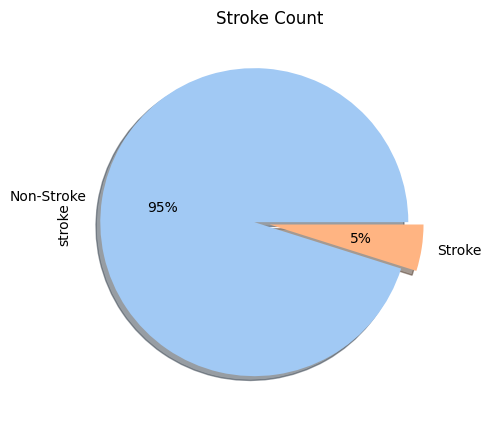

In [ ]:
fig,ax=plt.subplots(figsize = (5,5))
lab = ['Non-Stroke','Stroke']
col = sns.color_palette('pastel')[0:5]
df['stroke'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.f%%',shadow=True,labels = lab, colors = col)
plt.title("Stroke Count")
plt.show()

In [ ]:
#====================== CLASSIFICATION ===============================

# === RANDOM FOREST ===


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=0)

rf.fit(X_train, y_train)

pred_rf=rf.predict(X_test)


from sklearn import metrics

acc_rf=metrics.accuracy_score(y_test,pred_rf)*100

print()
print("----------------------------------------------------")
print("Machine Learning ----> Random Forest                ")
print("----------------------------------------------------")
print()

print("1. Accuracy =", acc_rf,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_test,pred_rf))


----------------------------------------------------
Machine Learning ----> Random Forest                
----------------------------------------------------

1. Accuracy = 94.9119373776908 %

2. Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.75      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.85      0.53      0.54      1022
weighted avg       0.94      0.95      0.93      1022



In [ ]:
# ==== K NEAREST NEIGHBOUR ===

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


knn.fit(X_train, y_train)

pred_knn=knn.predict(X_test)

acc_knn=metrics.accuracy_score(y_test,pred_knn)*100

print()
print("----------------------------------------------------")
print("Machine Learning ----> K-Nearest Neighbors          ")
print("----------------------------------------------------")
print()

print("1. Accuracy =", acc_knn,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_test,pred_rf))


----------------------------------------------------
Machine Learning ----> K-Nearest Neighbors          
----------------------------------------------------

1. Accuracy = 94.52054794520548 %

2. Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.75      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.85      0.53      0.54      1022
weighted avg       0.94      0.95      0.93      1022



In [ ]:
# === CNN

from keras.models import Model
from keras.layers import Conv1D, MaxPool1D, Flatten, Input,Dense

inp =  Input(shape=(10,1))
conv = Conv1D(filters=2, kernel_size=2)(inp)
pool = MaxPool1D(pool_size=2)(conv)
flat = Flatten()(pool)
dense = Dense(1)(flat)
model = Model(inp, dense)
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
model.summary()

import numpy as np
xx=np.expand_dims(X_train,axis=2)

history = model.fit(xx, y_train,epochs=10, batch_size=15, verbose=1,validation_split=0.2)

res=history.history['loss']
loss=min(res)
acc_cnn=100-loss

pred_cnn=model.predict(xx)
y_pred1 = pred_cnn.reshape(-1)
y_pred1[y_pred1<0.5] = 0
y_pred1[y_pred1>=0.5] = 1
y_pred1 = y_pred1.astype('int')

print()
print("----------------------------------------------------")
print("Deep Learning ----> CNN-1D          ")
print("----------------------------------------------------")
print()

print("1. Accuracy =", acc_cnn,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_train,y_pred1))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 9, 2)              6         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 2)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________

In [ ]:
# === LSTM

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import  Dropout

import numpy as np
xx=np.expand_dims(X_train,axis=2)

model = Sequential()
model.add(LSTM(input_shape=(10,1), kernel_initializer="uniform", return_sequences=True, stateful=False, units=50))
model.add(Dropout(0.2))
model.add(LSTM(5, kernel_initializer="uniform", activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3,kernel_initializer="uniform",activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(xx, y_train, epochs=5, batch_size=200,verbose=1, shuffle=False)
acc_lstm=model.evaluate(xx,y_train,verbose=1)[1] * 100

print()
print("----------------------------------------------------")
print("Deep Learning ----> LSTM          ")
print("----------------------------------------------------")
print()

print("1. Accuracy =", acc_lstm,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_train,y_pred1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5)                 1120      
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 11,542
Trainable params: 11,542
Non-traina

In [ ]:
# ==== MULTI LAYER PRECEPTRON  ===

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)


mlp.fit(X_train, y_train)

pred_mlp=mlp.predict(X_test)

acc_mlp=metrics.accuracy_score(y_test,pred_mlp)*100

print()
print("----------------------------------------------------")
print("Deep Learning ----> Multi Layer Perceptron          ")
print("----------------------------------------------------")
print()

print("1. Accuracy =", acc_mlp,'%')
print()
print("2. Classification Report:")
print()
print(metrics.classification_report(y_test,pred_mlp))


----------------------------------------------------
Deep Learning ----> Multi Layer Perceptron          
----------------------------------------------------

1. Accuracy = 94.71624266144813 %

2. Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



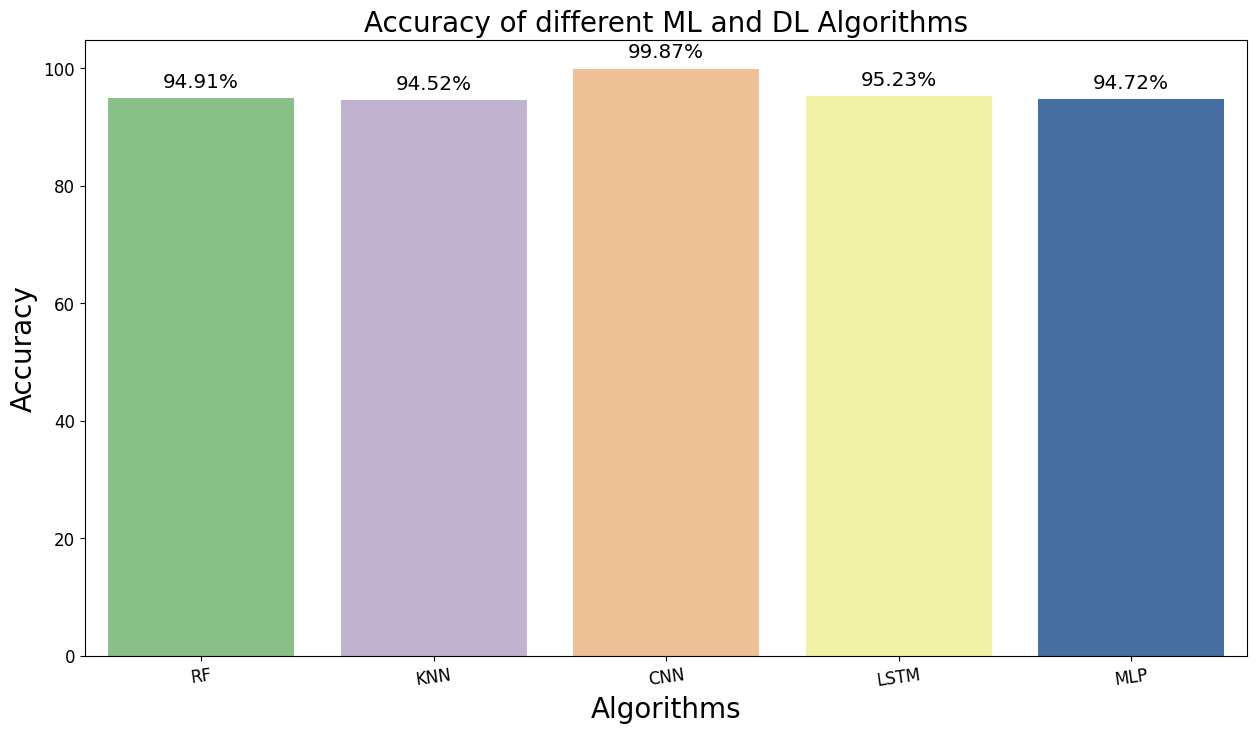

In [ ]:
#====================== VISUALIZATION ===============================

vals1=acc_rf
vals2=acc_knn
vals3=acc_cnn
vals4=acc_lstm
vals5=acc_mlp

final_data = pd.DataFrame({'Algorithms':['RF','KNN','CNN','LSTM','MLP'],
            'Accuracy':[vals1,vals2,vals3,vals4,vals5]})

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

fig = plt.figure(figsize = (15,8))
colors = sns.color_palette("Accent")
ax=sns.barplot(x=final_data['Algorithms'],y=final_data['Accuracy'],palette=colors)

plt.xlabel("Algorithms",fontsize = 20)
plt.ylabel("Accuracy",fontsize = 20)
plt.title("Accuracy of different ML and DL Algorithms",fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()